In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_csv = pd.read_csv('fct_invoice.csv')

df_csv.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df_json = pd.read_json('dim_customer.json')

df_json.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


## Easy

#### 1. How many unique customers are in the dataset?

In [4]:
len(df_csv['customer_id'].unique())

5191

#### 2. What are the different categories of products available? How many unique categories are there?

In [16]:
print(df_csv['category'].unique())

print(len(df_csv['category'].unique()))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


#### 3. Which payment method is the most popular? How many times was it used?

In [18]:
print(df_csv['payment_method'].value_counts())

print("\nThe most popular payment method is CASH and was used 44447 times.")

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

The most popular payment method is CASH and was used 44447 times.


## Medium

#### 1. What are the three most popular categories, by total sales?

In [88]:
df_csv['total_sales'] = df_csv['quantity'] * df_csv['price']

df_csv.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [89]:
df_csv.groupby(['category'])['total_sales'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

#### 2. What are the total sales attributed to customers over the age of 45?


In [5]:
merge_df = pd.merge(df_csv, df_json, left_on = df_csv['customer_id'], right_on = df_json['id'])

merge_df

,key_0,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,229,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson
1,229,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson
2,229,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson
3,229,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,229,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,4973,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,6161,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,6779,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,8386,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


In [26]:
ages = merge_df[merge_df['age'] > 45]

merge_df['total_sales'] = merge_df['quantity'] * merge_df['price']

total_sales_45 = ages['total_sales'].sum()

total_sales_45

82039768.15

#### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)



In [63]:
merge_df

,key_0,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,total_sales,age_range,age_group,year,month,year_month
0,229,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,NaN,William,M,229,Anderson,7502.00,NaN,NaN,2022,5,2022-05
1,229,I126377,229,Cosmetics,2,81.32,Credit Card,2021-05-04,Metrocity,NaN,William,M,229,Anderson,162.64,NaN,NaN,2021,5,2021-05
2,229,I178419,229,Shoes,3,1800.51,Debit Card,2021-01-06,Istinye Park,NaN,William,M,229,Anderson,5401.53,NaN,NaN,2021,1,2021-01
3,229,I847727,229,Clothing,3,900.24,Credit Card,2022-08-21,Zorlu Center,NaN,William,M,229,Anderson,2700.72,NaN,NaN,2022,8,2022-08
4,229,I219251,229,Shoes,5,3000.85,Credit Card,2022-06-23,Istinye Park,NaN,William,M,229,Anderson,15004.25,NaN,NaN,2022,6,2022-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,4973,I198027,4973,Shoes,1,600.17,Cash,2021-08-11,Kanyon,NaN,Melissa,F,4973,Bell,600.17,NaN,NaN,2021,8,2021-08
99453,6161,I989120,6161,Books,5,75.75,Cash,2021-08-01,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75,"(29.0, 39.0]",30-39,2021,8,2021-08
99454,6779,I791963,6779,Clothing,5,1500.40,Credit Card,2021-06-03,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00,NaN,NaN,2021,6,2021-06
99455,8386,I100582,8386,Clothing,2,600.16,Cash,2021-02-11,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32,"(39.0, 49.0]",40-49,2021,2,2021-02


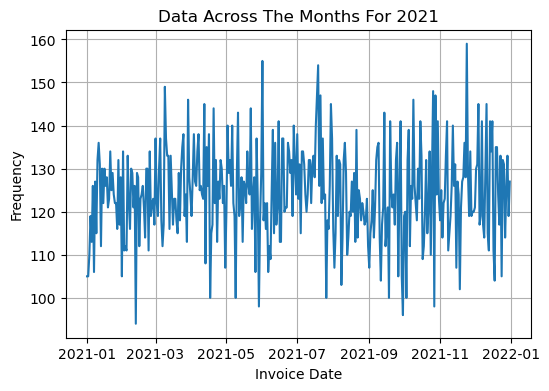

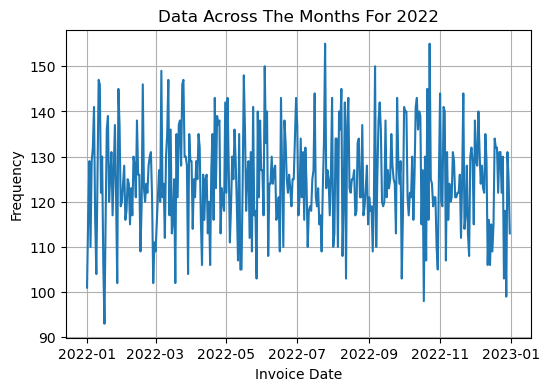

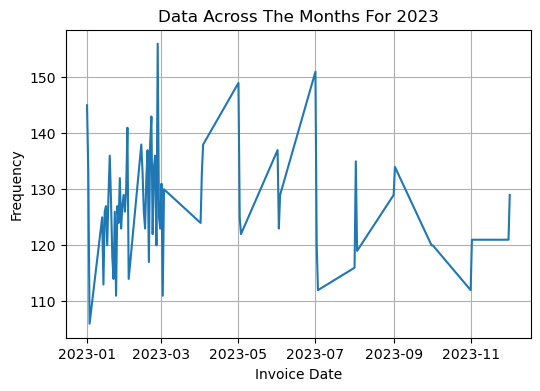

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

merge_df['invoice_date'] = pd.to_datetime(merge_df['invoice_date'])

merge_df['year'] = merge_df['invoice_date'].dt.year
merge_df['month'] = merge_df['invoice_date'].dt.month

merge_df['year_month'] = pd.to_datetime(merge_df['invoice_date']).dt.to_period('M')

#2021
data21 = merge_df[merge_df['year'] == 2021]
date21_count = data21['invoice_date'].value_counts().sort_index()

plt.figure(figsize = (6,4))
plt.plot(date21_count.index, date21_count.values)
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.title('Data Across The Months For 2021')
plt.grid(True)
plt.show()

#2022
data22 = merge_df[merge_df['year'] == 2022]
date22_count = data22['invoice_date'].value_counts().sort_index()

plt.figure(figsize = (6,4))
plt.plot(date22_count.index, date22_count.values)
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.title('Data Across The Months For 2022')
plt.grid(True)
plt.show()

#2023
data23 = merge_df[merge_df['year'] == 2023]
date23_count = data23['invoice_date'].value_counts().sort_index()

plt.figure(figsize = (6,4))
plt.plot(date23_count.index, date23_count.values)
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.title('Data Across The Months For 2023')
plt.grid(True)
plt.show()

In [ ]:
# it can be seen that there is a constant trend between 2021-2022 and 2023-03 with the frequency of sales continuously/quickly rising up and down. 
# However, come 2023 (around the second quarter) the data is more spread out, indicating that there were a lot of trends that may have risen slowly then dropped quickly afterwards.

## Hard

#### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

merge_df['age_group'] = pd.cut(x=merge_df['age'], bins=[9,19,29,39,49,59,69,79,89], labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
)


table = pd.pivot_table(data=merge_df, index=['category'], columns=['age_group'],values=['total_sales'], aggfunc=['sum'])

table

sum                                         \
                total_sales                                          
age_group             10-19        20-29        30-39        40-49   
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

                                                                   
                                                                   
age_group              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.96    649990.76   419082.62   254531.60  
Food & Beverage     72425.04     80976.09    55050.98    31332.93  
Shoes             5852857.84   5978893.54  4480269.05  2628744.60  
Souvenir            54943.32     55025.43    38673.81    23718.06  
Technology        4435200.00   5471550.00  3638250.00  1946700.00  
Toys               345067.52    363955.20   273244.16   153932.80